# 数値解析レポート

## べき乗法

インポート

In [1]:
import numpy as np

#### 実装

In [2]:
def power_method(A, inital_position, rel_eps = 0.0001, max_step_num=1000):
    """
    行列の固有値問題: べき乗法
    Parameters
    ----------
    A : numpy array
        Target matrix
    inital_position : numpy array
    rel_eps : float
    max_step_num : int

    Returns
    -------
    u : numpy array
        first left eigenvector of A
    eigen_value : float
        first eigenvalue of A
    """
    
    rel_eps = 0.0001 # 固有値の収束条件
    #クリロフ列生成

    # 初期値代入
    rel_delta_u=100.0
    pre_eigen_value = 0
    x = inital_position/np.linalg.norm(inital_position) # 正規化しておく
    
    for i in range(max_step_num):
        v = np.dot(A,x)
        eigen_value = np.dot(x, v)
        x = v/np.linalg.norm(v) # 固有ベクトルの正規化
        
        if (rel_delta_u < rel_eps):
            print(str(i+1)+"回で収束")
            print("eigen_value=",eigen_value)
            v = np.dot(A,x)
            x = v/np.linalg.norm(v) # 固有ベクトルの正規化
            print("eigen_vector=",x)
            return eigen_value, x
        
        if pre_eigen_value is not None:
            rel_delta_u = abs(eigen_value - pre_eigen_value)/abs(pre_eigen_value)
        
        pre_eigen_value = eigen_value
    
    print(str(i+1)+"回で収束しなかった")
    print("eigen_value=",eigen_value)
    v = np.dot(A,x)
    x = v/np.linalg.norm(v) # 固有ベクトルの正規化
    print("eigen_vector=",x)
    return eigen_value, x

### 問題設定

In [3]:
x0 = np.array([1.0, 1.0, 1.0]); 

A1=np.array([[1.0, 0.0 , 0.0],[0.0, 5.0 , -1.0], [0.0, 3.0 , 0.0]])
A2=np.array([[1.0, 0.0 , 0.0],[0.0, 0.0 , -1.0], [0.0, 3.0 , 0.0]])

### 実行

In [4]:
lamda,x = power_method(A1, x0)

8回で収束
eigen_value= 4.302773024506958
eigen_vector= [1.77144259e-06 8.20300149e-01 5.71933269e-01]


/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


### ライブラリで確認

In [5]:
def getMaxEig(A):
    """絶対値最大の固有値とそれに対応する固有ベクトルを取り出す。確認用の関数"""
    eig_val, eig_vec =np.linalg.eig(A) # 固有値・固有ベクトルをそれぞれeig_val, eig_vecに格納する

    max_eig_val_index = np.argmax(abs(eig_val))
    max_eig_val = eig_val[max_eig_val_index]
    max_eig_vec = eig_vec[max_eig_val_index]

    #計算結果の出力
    print ("eig_val=", max_eig_val) 
    print("eig_vec=",max_eig_vec/np.linalg.norm(max_eig_vec))

In [6]:
getMaxEig(A1)

eig_val= 4.302775637731995
eig_vec= [-0.266022   -0.96396696  0.        ]


In [7]:
(5+np.sqrt(13))/2

4.302775637731995

In [346]:
hoge, fuga =np.linalg.eig(A1)

In [347]:
print(hoge)
print(fuga)

[0.69722436 4.30277564 1.        ]
[[ 0.          0.          1.        ]
 [-0.22637487 -0.82030016  0.        ]
 [-0.97404026 -0.57193326  0.        ]]


In [348]:
1/(5+np.sqrt(13))/2

0.058102030189000446

### 次

In [8]:
lamda,x = power_method(A2, x0)
getMaxEig(A2)

1000回で収束しなかった
eigen_value= -0.5999999999999999
eigen_vector= [ 8.69706348e-240 -3.16227766e-001  9.48683298e-001]
eig_val= 1.7320508075688772j
eig_vec= [0.+0.j 0.-0.j 1.+0.j]


/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [9]:
lamda,x = power_method(A2, x0,rel_eps = 0.0001, max_step_num=10**5)

/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


100000回で収束しなかった
eigen_value= -0.5999999999999999
eigen_vector= [ 0.         -0.31622777  0.9486833 ]


$A_2$は収束しなかった  
理由としては条件数$cond(A)=||A|| \cdot ||A^{-1}||$が大きい可能性がある

### 条件数の計算

In [10]:
# import
from numpy import linalg as LA

In [11]:
def getCond(A):
    A_inv = np.linalg.inv(A)
    cond = np.linalg.norm(A,2) * np.linalg.norm(A_inv,2)
    return cond

In [12]:
cond2 = getCond(A2)
print("cond=",cond2)

cond= 3.0


In [13]:
cond1 = getCond(A1)
print("cond=",cond1)

cond= 11.580313216522223


関係なかった  
条件数は制度に関してのみ影響するだけだった  
固有値が近接してるから収束が遅い???  
→ $\lambda_1 = - \lambda_2$と振動していたので収束しなかった

In [14]:
eig_val2, eig_vec2 =np.linalg.eig(A2)
print(eig_val2)

[0.+1.73205081j 0.-1.73205081j 1.+0.        j]


近接してる  
固有値が複素数であることも理由の一つ???

In [15]:
# ちなみにA1は
eig_val1, eig_vec1 =np.linalg.eig(A1)
print(eig_val1)

[0.69722436 4.30277564 1.        ]


固有値が互いに離れているので収束が早い

In [16]:
# x1 = np.array([-1.0j, -1.0j, -1.0j]); 
I = np.identity(np.shape(A2)[0])
mu = 1.7j 
lamda,x = power_method(A2 + mu*I , x0)

1000回で収束しなかった
eigen_value= (-1.4861215932167724+0.8580127018922188j)
eigen_vector= [-1.27340872e-241-3.17249433e-242j -2.50000000e-001+4.33012702e-001j
  7.50000000e-001+4.33012702e-001j]


/Users/m-narumiya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [17]:
hoge, fuga=np.linalg.eig(A2 + mu*I)
print(hoge)

[ 0.00000000e+00+3.43205081j -9.22709807e-17-0.03205081j
  1.00000000e+00+1.7       j]


In [18]:
LA.norm(1+1.7j)/LA.norm(3.43205081j)

0.574673395447663

In [19]:
LA.norm(1)/LA.norm(4.30277564)

0.2324081206334988

## CG法(共役勾配法)

In [24]:
def cgMethod(A, b, initial_point=None, max_step=100, eps=10**(-8)):
    """共役勾配法で連立線形方程式をとく
    ---Input---
    A : np.array.n*nの係数行列.
    b : np.array. n*1の縦ベクトル.
    initial_point : np.array. 初期値.
    max_step : int.最大のステップ回数.
    eps : float. 収束判定に使う.
    
    ---return---
    x : np.array. 答えとなるベクトル.
    """
    
    if (initial_point is None):
        initial_point = np.zeros([np.shape(b)[0], 1])
    
    x = initial_point
    p = r = b - np.dot(A, x)
    
    
    for i in range(max_step):
        times_A_and_p = np.dot(A, p)
        work = np.dot(p.T, times_A_and_p)
        alpha = np.dot(p.T, r)/work
        x += alpha*p
        r -=  alpha*times_A_and_p
        
        # 収束判定 : 残渣がepsを下回れば停止
        if (np.linalg.norm(r) < eps):
            print(i+1,"回で収束")
            return x
        
        # 収束しなかったら更新
        else:
            beta = - np.dot(r.T, times_A_and_p)/work
            p = r + beta*p

    print(max_step,"回で失敗")
    return x,

### 問題設定

In [21]:
def setAmat(size_N, c):
    """
    size_N*size_Nで対角成分がc、その前後のみ-1の行列Aを返す。
    """
    tmp = np.triu(-np.ones([size_N, size_N]), 1) - np.triu(-np.ones([size_N, size_N]), 2)
    
    return c*np.identity(size_N) + tmp + tmp.T

### 値を与えて解いてみる

In [22]:
def solveQuestionCG(N):
    """連立一次方程式をCG法で問題をとく。
    ---return---
    b : 方程式に使ったベクトル
    x1 : c=2のときの解
    x2 : c=20のときの解
    """
    A1 = setAmat(N, 2)
    A2 = setAmat(N, 20)
    b = np.random.randint(1, 9, (N, 1)) 
    
    print("c=2のとき")
    x1 = cgMethod(A1, b)
    print("ライブラリの解との差のlog10=",np.log10(np.linalg.norm(x1-np.linalg.solve(A1, b))))
    
    print("c=20のとき")
    x2 = cgMethod(A2, b)
    print("ライブラリの解との差のlog10=",np.log10(np.linalg.norm(x2-np.linalg.solve(A2, b))))
    
    return b, x1, x2

In [25]:
b1, x1, x2 = solveQuestionCG(4)

c=2のとき
5 回で収束
ライブラリの解との差のlog10= -13.972318537151436
c=20のとき
5 回で収束
ライブラリの解との差のlog10= -16.105104768022994


In [26]:
b2, x1, x2 = solveQuestionCG(2**5)

c=2のとき
33 回で収束
ライブラリの解との差のlog10= -11.079000077233344
c=20のとき
8 回で収束
ライブラリの解との差のlog10= -10.330491737172647


## 共役勾配法以外の連立一次方程式の反復解法

### ヤコビ法

In [326]:
def jacobi(A, b, initial_point=None, eps=10**(-8), max_step=100):
    """線形連立方程式をヤコビ法で解く
    ---return---
    x : ヤコビ法で求められた数値解
    """

    if (initial_point is None):
        initial_point = np.ones([np.shape(b)[0], 1])
        
    x_old = initial_point
    error = 1e12

    dig_array = np.diag(A)
    D = np.diagflat(dig_array)
    D_inv = np.diagflat(1/dig_array)
    dig_ndarray = np.array([dig_array])
    R = A - D
    
    # 反復法でのMを計算する
    M = np.dot(D_inv, R)
    norm_M = np.linalg.norm(M, np.inf)
    
    for i in range(max_step):
        x = (b-np.dot(R, x_old))/dig_ndarray.T
        error = np.linalg.norm(x-x_old)/np.linalg.norm(x)
        
        # 収束判定
        if (error < eps):
            print(i+1,"回で収束")
            return x, norm_M
        
        else:
            x_old = x
    
   #  print("x=",x)
    print(max_step,"回で失敗")
    return x, norm_M

### テスト関数

In [28]:
def testSolve(method_func, N, c, b, eps_num=10**(-8), max_step_num=10**4):
    A = setAmat(N, c)
    x, m_norm = method_func(A, b, eps=eps_num, max_step=max_step_num)
    ans = np.linalg.solve(A, b)
    print("ライブラリの解との差の対数: ",np.log10(np.linalg.norm(x-ans)))
    print("Mのノルムの値: ",m_norm)
    if (m_norm < 1):
        print("推定ループ回数: ", np.log(eps_num)/np.log(m_norm))
    elif (m_norm == 1):
        print("収束するが回数を要する")
    else:
        print("収束しない")

#### 試してみる

In [327]:
testSolve(jacobi, 4, 2, b1)
testSolve(jacobi, 4, 20, b1)

80 回で収束
ライブラリの解との差の対数:  -5.803787198423189
Mのノルムの値:  1.0
収束するが回数を要する
9 回で収束
ライブラリの解との差の対数:  -9.766480544587312
Mのノルムの値:  0.1
推定ループ回数:  8.000000000000002


In [328]:
testSolve(jacobi, 2**5, 2, b2)
testSolve(jacobi,2**5, 20, b2)

2870 回で収束
ライブラリの解との差の対数:  -2.2804028701936065
Mのノルムの値:  1.0
収束するが回数を要する
10 回で収束
ライブラリの解との差の対数:  -9.409550504780483
Mのノルムの値:  0.1
推定ループ回数:  8.000000000000002


### ガウス・ザイデル法

In [329]:
def gaussSeidel(A, b, initial_point=None, eps=10**(-8), max_step=10**3):
    """線形連立方程式をガウス・ザイデル法で解く
    ---return---
    x : ヤコビ法で求められた数値解
    """
    
    if (initial_point is None):
        initial_point = np.ones([np.shape(b)[0], 1])
        
    x_old = initial_point
    error = 1e12
    
    L = np.tril(A)
    U = A - L
    LInv = np.linalg.inv(L)
    
    # 反復法でのMを計算する
    M = np.dot(LInv, U)
    norm_M = np.linalg.norm(M,np.inf)
    
    for i in range(max_step):
        x = np.dot(LInv, b-np.dot(U, x_old))
        error = np.linalg.norm(x-x_old)/np.linalg.norm(x)
        
        if (error  < eps):
            print(i+1,"回で収束")
            return x, norm_M
        
        else:
            x_old = x
    
    print(max_step,"回で収束しない")
    
    return x, norm_M

#### テスト

In [330]:
gaussSeidel(setAmat(4, 2), b1)

43 回で収束


(array([[15.19999975],
        [22.39999967],
        [22.59999973],
        [14.79999987]]), 0.875)

#### 実行

In [331]:
testSolve(gaussSeidel, 4, 2, b1)
testSolve(gaussSeidel, 4, 20, b1)

43 回で収束
ライブラリの解との差の対数:  -6.28946808007715
Mのノルムの値:  0.875
推定ループ回数:  137.95018820592654
6 回で収束
ライブラリの解との差の対数:  -10.553374454718243
Mのノルムの値:  0.052625000000000005
推定ループ回数:  6.255826270173031


In [332]:
testSolve(gaussSeidel, 2**5, 2, b2)
testSolve(gaussSeidel, 2**5, 20, b2)

1512 回で収束
ライブラリの解との差の対数:  -2.5832445942609326
Mのノルムの値:  0.9999999995343387
推定ループ回数:  39558110673.45584
8 回で収束
ライブラリの解との差の対数:  -9.6377690564688
Mのノルムの値:  0.052631578947368425
推定ループ回数:  6.256091864796327


In [35]:
np.log(10**(-8))/np.log(0.052631578947368425)

6.256091864796327

## SOR法

In [333]:
def SOR(A, b, initial_point=None, eps=10**(-8), max_step=10**3):
    """線形連立方程式を SOR 法で解く
    ---return---
    x : ヤコビ法で求められた数値解
    norm_M : float. 反復行列Mの無限ノルム.
    """

    if (initial_point is None):
        initial_point = np.ones([np.shape(b)[0], 1])
        
    x_old = initial_point
    error = 1e12

    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = A - L - D # Aからできた上三角行列

    Mj = np.dot(np.linalg.inv(D), -(L+U)) # ヤコビ法の反復行列
    rho_Mj = max(abs(np.linalg.eigvals(Mj))) # ヤコビ法の反復行列のスペクトル半径を求める
    w = 2/(1+np.sqrt(1-rho_Mj**2)) # 緩和係数を定める

    T = np.linalg.inv(D+w*L)
    Lw = np.dot(T, -w*U+(1-w)*D)
    c = np.dot(T, w*b)
    
    # 反復法でのMを計算する
    norm_M = np.linalg.norm(Lw,np.inf)
    
    for i in range(max_step):
        x = np.dot(Lw, x_old) + c
        error = np.linalg.norm(x-x_old)/np.linalg.norm(x)
        
        if (error < eps):
            print(i+1, "回で収束")
            return x, norm_M   
        x_old = x
       
    print(max_step,"回で収束しない")
    return x, norm_M

In [334]:
testSolve(SOR, 4, 2, b1)

18 回で収束
ライブラリの解との差の対数:  -7.382047326823862
Mのノルムの値:  0.9561392285664565
推定ループ回数:  410.7015861775613


In [335]:
testSolve(SOR, 4, 20, b1)

6 回で収束
ライブラリの解との差の対数:  -12.209237305445372
Mのノルムの値:  0.051723730416391736
推定ループ回数:  6.219339818409555


In [336]:
testSolve(SOR, 2**5, 2, b2)

107 回で収束
ライブラリの解との差の対数:  -3.96604862960091
Mのノルムの値:  1.7395858123826198
収束しない


In [337]:
testSolve(SOR, 2**5, 20, b2)

8 回で収束
ライブラリの解との差の対数:  -9.802668057637392
Mのノルムの値:  0.052614250686429526
推定ループ回数:  6.255392293349759


## まとめて解いてみる

In [41]:
# インポート
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [148]:
import os

In [355]:
class sloveSimultaneousEq(object):
    """連立一次方程式に対する解法"""
    
    _KMAX = 10**5
    _error_eps = 10**(-8)
    
    cg_x1 = cg_x2 = None
    cg_error1 = cg_error2 = None
    cg_m_norm1 = cg_m_norm2 = None
    
    jacobi_x1 = jacobi_x2 = None
    jacobi_error1 = jacobi_error2 = None
    jacobi_m_norm1 = jacobi_m_norm2 = None
    
    gaussSeidel_x1 = gaussSeidel_x2 = None
    gaussSeidel_error1 = gaussSeidel_error2 = None
    gs_m_norm1 = gs_m_norm2 = None
    
    SOR_x1= SOR_x2 = None
    SOR_error1= SOR_error2 = None
    sor_m_norm1 = sor_m_norm2 = None
    
    exist_dir = False
    
    def __init__(self, N, initial_point=None):
        """問題設定をする。Nはサイズ数"""
        self.N = N
        self.dir_path = "figure/errorPlot_N_"+str(N)
        self.b = np.random.randint(1, 9, (N, 1)) 
        self.A1 = self.setAmat(N, 2)
        self.A2 = self.setAmat(N, 20)
        
        if (initial_point is None):
            self.initial_point = np.ones([N,1])

    def setAmat(self, size_N, c):
        """
        size_N*size_Nで対角成分がc、その前後のみ-1の行列Aを返す。
        """
        tmp = np.triu(-np.ones([size_N, size_N]), 1) - np.triu(-np.ones([size_N, size_N]), 2)
        return c*np.identity(size_N) + tmp + tmp.T
    
    def doCG(self, eps=_error_eps, max_step_num=_KMAX):
        """A1,A2とbについてCG法を実行する"""
        print("---CG法実行---")
        print("c=2のとき : ")
        self.cg_x1, self.cg_error1 = self.cg(self.A1,  self.b, self.initial_point)
        print("c=20のとき : ")
        self.cg_x2, self.cg_error2 = self.cg(self.A2,  self.b, self.initial_point)
        print("--"*7)
    
    def doJacobi(self, eps=_error_eps, max_step_num=_KMAX):
        """A1,A2とbについてJacobi法を実行する"""
        print("---Jacobi法実行---")
        print("c=2のとき : ")
        self.jacobi_x1, self.jacobi_m_norm1, self.jacobi_error1 = self.jacobi(self.A1,  self.b, self.initial_point)
        print("c=20のとき : ")
        self.jacobi_x2, self.jacobi_m_norm2, self.jacobi_error2 = self.jacobi(self.A2,  self.b, self.initial_point)
        print("--"*7)
        
    def doGaussSeidel(self, eps=_error_eps, max_step_num=_KMAX):
        """A1,A2とbについてJacobi法を実行する"""
        print("---GaussSeidel法実行---")
        print("c=2のとき : ")
        self.gaussSeidel_x1, self.gs_m_norm1, self.gaussSeidel_error1 = self.gaussSeidel(self.A1,  self.b, self.initial_point)
        print("c=20のとき : ")
        self.gaussSeidel_x2, self.gs_m_norm2, self.gaussSeidel_error2 = self.gaussSeidel(self.A2,  self.b, self.initial_point)
        print("--"*7)
    
    def doSOR(self, eps=_error_eps, max_step_num=_KMAX):
        """A1,A2とbについてJacobi法を実行する"""
        print("---SOR法実行---")
        print("c=2のとき : ")
        self.SOR_x1, self.sor_m_norm1, self.SOR_error1 = self.SOR(self.A1,  self.b, self.initial_point)
        print("c=20のとき : ")
        self.SOR_x2, self.sor_m_norm2, self.SOR_error2 = self.SOR(self.A2,  self.b, self.initial_point)
        print("--"*7)
    
    
    def cg(self, A, b, initial_point=None, eps=_error_eps, max_step=_KMAX):
        """共役勾配法で連立線形方程式をとく
        ---Input---
        A : np.array.n*nの係数行列.
        b : np.array. n*1の縦ベクトル.
        initial_point : np.array. 初期値.
        max_step : int.最大のステップ回数.
        eps : float. 収束判定に使う.

        ---return---
        x : np.array. 答えとなるベクトル.
        """

        if (initial_point is None):
            initial_point = np.zeros([np.shape(b)[0], 1])

        x = np.copy(initial_point)
        p = r = b - np.dot(A, x)

        #  残差
        residual_errors = []

        for i in range(max_step):
            times_A_and_p = np.dot(A, p)
            work = np.dot(p.T, times_A_and_p)
            alpha = np.dot(p.T, r)/work
            x += alpha*p
            r -=  alpha*times_A_and_p
            error = np.linalg.norm(r, 2)/np.linalg.norm(b,2)
            residual_errors.append(np.copy(r))

            # 収束判定 : 残渣がepsを下回れば停止
            if (error < eps):
                print(i+1,"回で収束")
                return x, residual_errors

            # 収束しなかったら更新
            else:
                beta = - np.dot(r.T, times_A_and_p)/work
                p = r + beta*p

        print(max_step,"回で失敗")
        return x, residual_errors
    
    
    def jacobi(self, A, b, initial_point=None, eps=_error_eps, max_step=_KMAX):
        """線形連立方程式をヤコビ法で解く
        ---return---
        x : ヤコビ法で求められた数値解
        residual_errors : 配列。各ループごとの残差。
        """

        if (initial_point is None):
            initial_point = np.zeros([np.shape(b)[0], 1])

        x_old = np.copy(initial_point)
        error = 1e12

        dig_array = np.diag(A)
        D = np.diagflat(dig_array)
        D_inv = np.diagflat(1/dig_array)
        dig_ndarray = np.array([dig_array])
        R = A - D
        
        # 反復法でのMを計算する
        M = np.dot(D_inv, R)
        norm_M = np.linalg.norm(M, np.inf)

        # 残差
        residual_error = 0
        residual_errors = []

        for i in range(max_step):
            x = (b-np.dot(R, x_old))/dig_ndarray.T
            residual_error = np.linalg.norm(np.dot(A,x)-b, 2)
            error = residual_error/np.linalg.norm(b,2)
            residual_errors.append(np.copy(residual_error))

            # 収束判定
            if (error < eps):
                print(i+1,"回で収束")
                return x, norm_M, residual_errors

            else:
                x_old = x

        print(max_step,"回で失敗")
        return x, norm_M, residual_errors
    
    def gaussSeidel(self, A, b, initial_point=None, eps=_error_eps, max_step=_KMAX):
        """線形連立方程式をガウス・ザイデル法で解く
        ---return---
        x : ヤコビ法で求められた数値解
        residual_errors : array。各ループごとの残差の配列。
        """

        if (initial_point is None):
            initial_point = np.zeros([np.shape(b)[0], 1])

        x_old = np.copy(initial_point)
        error = 1e12

        L = np.tril(A)
        U = A - L
        LInv = np.linalg.inv(L)
        
        # 反復法でのMを計算する
        M = np.dot(LInv, U)
        norm_M = np.linalg.norm(M,np.inf)

        # 残差
        residual_error = 0
        residual_errors = []

        for i in range(max_step):
            x = np.dot(LInv, b-np.dot(U, x_old))
            residual_error = np.linalg.norm(np.dot(A,x)-b, 2)
            error = residual_error/np.linalg.norm(b,2)
            residual_errors.append(np.copy(residual_error))

            if (error  < eps):
                print(i+1,"回で収束")
                return x, norm_M, residual_errors

            else:
                x_old = x

        print(max_step,"回で収束しない")

        return x, norm_M, residual_errors
    
    
    def SOR(self, A, b, initial_point=None, eps=_error_eps, max_step=_KMAX):
        """線形連立方程式を SOR 法で解く
        ---return---
        x : ヤコビ法で求められた数値解
        residual_errors : 配列。各ループごとの残差。
        """

        if (initial_point is None):
            initial_point = np.zeros([np.shape(b)[0], 1])

        x_old = np.copy(initial_point)
        error = 1e12

        D = np.diag(np.diag(A))
        L = np.tril(A, -1)
        U = A - L - D # Aからできた上三角行列

        Mj = np.dot(np.linalg.inv(D), -(L+U)) # ヤコビ法の反復行列
        rho_Mj = max(abs(np.linalg.eigvals(Mj))) # ヤコビ法の反復行列のスペクトル半径を求める
        w = 2/(1+np.sqrt(1-rho_Mj**2)) # 緩和係数を定める

        T = np.linalg.inv(D+w*L)
        Lw = np.dot(T, -w*U+(1-w)*D)
        c = np.dot(T, w*b)
        
        # 反復法でのMを計算する
        norm_M = np.linalg.norm(Lw,np.inf)

         # 残差
        residual_error = 0
        residual_errors = []

        for i in range(max_step):
            x = np.dot(Lw, x_old) + c
            residual_error = np.linalg.norm(np.dot(A,x)-b, 2)
            error = residual_error/np.linalg.norm(b,2)
            residual_errors.append(np.copy(residual_error))

            if (error < eps):
                print(i+1, "回で収束")
                return x, norm_M,residual_errors 
            
            else:
                x_old = x

        print(max_step,"回で収束しない")
        return x, norm_M, residual_errors
    
    
    def judgeSpeed(self, method):
        """反復法において収束のはやさを判断する"""
        print("----収束速度判定---")
        
        if (method == "jacobi"):
            print("c=2のとき : ")
            self.judgeMnorm(self.jacobi_m_norm1)
            print("--"*5)
            print("c=20のとき : ")
            self.judgeMnorm(self.jacobi_m_norm2)
            
        elif (method == "gs"):
            print("c=2のとき : ")
            self.judgeMnorm(self.gs_m_norm1)
            print("--"*5)
            print("c=20のとき : ")
            self.judgeMnorm(self.gs_m_norm2)

        elif (method == "sor"):
            print("c=2のとき : ")
            self.judgeMnorm(self.sor_m_norm1)
            print("c=20のとき : ")
            self.judgeMnorm(self.sor_m_norm2)
            
        else:
            print("mthodはjacobi, gs, sorで選んでください")
        
        print("--"*7)
    
    def judgeMnorm(self, m_norm):
        print("Mのノルムの値: ",m_norm)
        if (m_norm < 1):
            print("推定ループ回数: ", np.log(self._error_eps)/np.log(m_norm))
        elif (m_norm == 1):
            print("収束するが回数を要する")
        else:
            print("収束しない")
    
    
    def plotGraph(self, y1_list, y2_list, method_name, save_pathname=None):
        """回数ごとの変化をグラフとして書き出す関数"""
        
        times = range(len(y1_list))
        y = np.array([np.log10(np.linalg.norm(y)) for y in y1_list])
        plt.plot(times, y, label='$c = 2$', linestyle='solid', marker='x')
        
        times = range(len(y2_list))
        y = np.array([np.log10(np.linalg.norm(y)) for y in y2_list])
        plt.plot(times, y, label='$c = 20$', linestyle='dashdot', marker='*')
        plt.xlabel("steps")
        
        # タイトルをつける
        if self.N > 8:
            title_name = "Residual Error of " + method_name
        else:
            title_name = "Residual Error of " + method_name + " by $b=" + str(self.b[:,0]).replace(' ', ', ')+"^T$"
        
        plt.title(title_name)
            
            
        plt.legend()

        if save_pathname is not None:
            # save as png
            plt.savefig(save_pathname) 

        plt.show()
        
    def plotError(self, method, do_method=False, save=False):
        """残差をプロットする"""
        
        if (save and not(self.exist_dir)):
            if not(os.path.exists(self.dir_path)):
                os.makedirs(self.dir_path)
                self.exist_dir = True
            else:
                self.exist_dir = True
        
        save_pathname = None
        
        if (method == "all"):
            # 全て描画
            method_names = ["cg", "jacobi", "gs", "sor"]
            
            for method_name in method_names:
                self.plotError(method_name, do_method, save)
        
        elif (method == "cg"):
            # CG法のみ描画
            if (do_method or self.cg_error1 is None):
                self.doCG()
            
            if (save):
                save_pathname = self.dir_path+"/cg.png"
                
            self.plotGraph(self.cg_error1, self.cg_error2, "CG", save_pathname)
        
        elif (method == "jacobi"):
            # ヤコビ法のみ描画
            if (do_method or self.jacobi_error1 is None):
                self.doJacobi()
                self.judgeSpeed("jacobi")
            
            if (save):
                save_pathname = self.dir_path+"/jacobi.png"
                
            self.plotGraph(self.jacobi_error1, self.jacobi_error2, "Jacobi", save_pathname)
        
        elif (method == "gs"):
            # GaussSeidel法のみ描画
            if (do_method or self.gaussSeidel_error1 is None):
                self.doGaussSeidel()
                self.judgeSpeed("gs")
            
            if (save):
                save_pathname =self.dir_path+"/gaussSeidel.png"
            
            self.plotGraph(self.gaussSeidel_error1, self.gaussSeidel_error2, "GaussSeidel", save_pathname)
            
        
        elif (method == "sor"):
            # SOR法のみ描画
            if (do_method or self.SOR_error1 is None):
                self.doSOR()
                self.judgeSpeed("sor")
            
            if (save):
                save_pathname = self.dir_path+"/sor.png"
            
            self.plotGraph(self.SOR_error1, self.SOR_error2, "SOR", save_pathname)
        
        else:
            print("method名はcg, jacobi, gauss, sor, allのいずれかを指定してください")

In [356]:
test = sloveSimultaneousEq(2**3)

In [259]:
test.b

array([[4],
       [4],
       [3],
       [7],
       [1],
       [3],
       [2],
       [7]])

In [340]:
test.doCG()

---CG法実行---
c=2のとき : 
9 回で収束
c=20のとき : 
7 回で収束
--------------


In [341]:
test.doSOR()
test.judgeSpeed("sor")

---SOR法実行---
c=2のとき : 
33 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.2354358948485538
収束しない
c=20のとき : 
Mのノルムの値:  0.052328224096172785
推定ループ回数:  6.243834194214405
--------------


In [342]:
test.doJacobi()
test.judgeSpeed("jacobi")

---Jacobi法実行---
c=2のとき : 
294 回で収束
c=20のとき : 
9 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.0
収束するが回数を要する
----------
c=20のとき : 
Mのノルムの値:  0.1
推定ループ回数:  8.000000000000002
--------------


In [263]:
test.doGaussSeidel()
test.judgeSpeed("gs")

---GaussSeidel法実行---
c=2のとき : 
148 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  0.9921875
推定ループ回数:  2348.624755143935
----------
c=20のとき : 
Mのノルムの値:  0.052631578906250004
推定ループ回数:  6.256091863136393
--------------


---CG法実行---
c=2のとき : 
9 回で収束
c=20のとき : 
6 回で収束
--------------


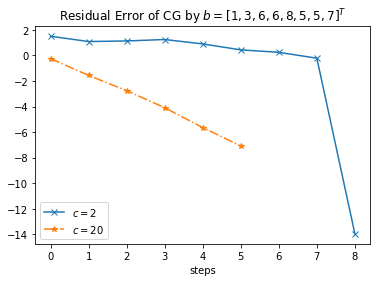

In [296]:
test.plotError("cg")

---CG法実行---
c=2のとき : 
9 回で収束
c=20のとき : 
6 回で収束
--------------


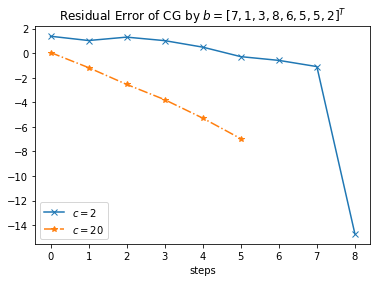

---Jacobi法実行---
c=2のとき : 
294 回で収束
c=20のとき : 
9 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.0
収束するが回数を要する
----------
c=20のとき : 
Mのノルムの値:  0.1
推定ループ回数:  8.000000000000002
--------------


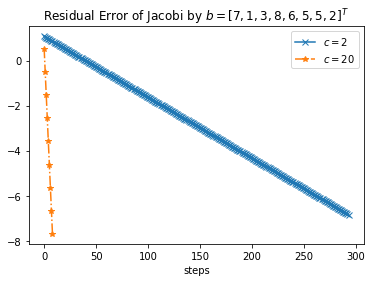

---GaussSeidel法実行---
c=2のとき : 
148 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  0.9921875
推定ループ回数:  2348.624755143935
----------
c=20のとき : 
Mのノルムの値:  0.052631578906250004
推定ループ回数:  6.256091863136393
--------------


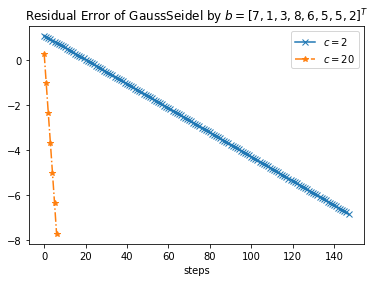

---SOR法実行---
c=2のとき : 
33 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.2354358948485538
収束しない
c=20のとき : 
Mのノルムの値:  0.052328224096172785
推定ループ回数:  6.243834194214405
--------------


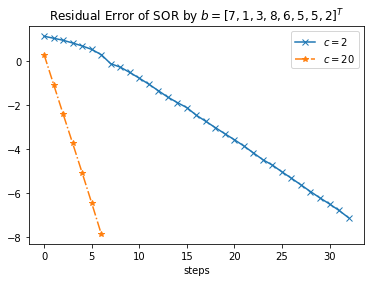

In [357]:
test.plotError("all", save=True)

### テスト

In [206]:
testSolve(SOR, 8, 20, test.b)

7 回で収束
ライブラリの解との差の対数:  -9.606398271871873
Mのノルムの値:  0.052328224096172785
推定ループ回数:  6.243834194214405


In [343]:
test2 = sloveSimultaneousEq(2**5)

---CG法実行---
c=2のとき : 
33 回で収束
c=20のとき : 
7 回で収束
--------------


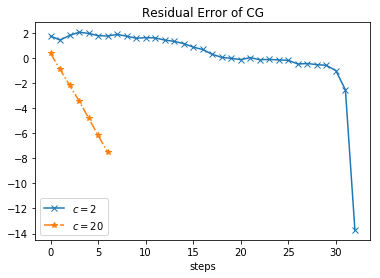

---Jacobi法実行---
c=2のとき : 
4009 回で収束
c=20のとき : 
9 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.0
収束するが回数を要する
----------
c=20のとき : 
Mのノルムの値:  0.1
推定ループ回数:  8.000000000000002
--------------


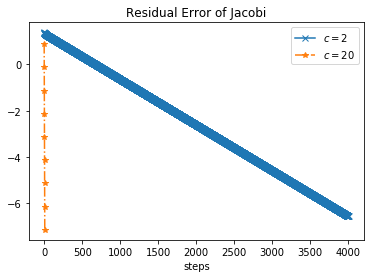

---GaussSeidel法実行---
c=2のとき : 
2006 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  0.9999999995343387
推定ループ回数:  39558110673.45584
----------
c=20のとき : 
Mのノルムの値:  0.052631578947368425
推定ループ回数:  6.256091864796327
--------------


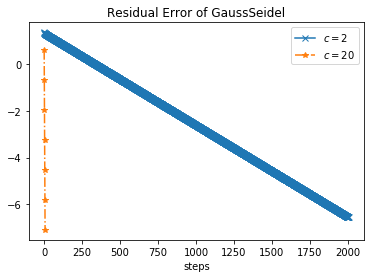

---SOR法実行---
c=2のとき : 
121 回で収束
c=20のとき : 
7 回で収束
--------------
----収束速度判定---
c=2のとき : 
Mのノルムの値:  1.7395858123826198
収束しない
c=20のとき : 
Mのノルムの値:  0.052614250686429526
推定ループ回数:  6.255392293349759
--------------


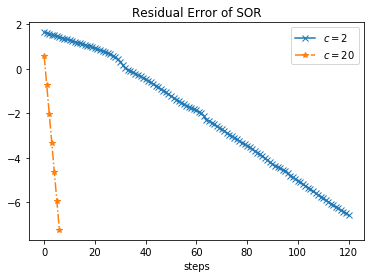

In [344]:
test2.plotError("all", save=True)

In [345]:
str(test2.b[:,0]).replace(' ', ', ')

'[5, 7, 4, 6, 1, 6, 6, 3, 2, 4, 4, 7, 4, 4, 5, 1, 7, 3, 3, 7, 2, 2, 5, 6, 5, 1, 1, 8, 8, 2, 6, 1]'

In [306]:
testSolve(SOR, test2.N, 2, test2.b)

107 回で収束
ライブラリの解との差の対数:  -3.854305543704884
Mのノルムの値:  1.7395858123826198
収束しない


In [178]:
test.b[:,0]

array([5, 1, 4, 1, 8, 5, 1, 8])

In [325]:
test2.A1

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])